В данной исследовательской работе мы будем исследовать датасет о пассажирах титаника, он содержит в себе следующие признаки:
Survived — Выживание: индикатор того, выжил ли пассажир (1 — выжил, 0 — не выжил).
Pclass — Класс билета: указывает социально-экономический статус пассажира (1 — первый класс, 2 — второй, 3 — третий).
Name — Имя: полное имя пассажира.
Sex — Пол: пол пассажира (мужской — "male", женский — "female").
Age — Возраст: возраст пассажира в годах.
Siblings/Spouses Aboard — Количество братьев/сестер или супругов на борту.
Parents/Children Aboard — Количество родителей или детей на борту.
Fare — Стоимость билета: цена, которую пассажир заплатил за проезд.
Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Для начала построим и изобразим матрицу корреляций признаков, чтобы понять, какие из них связаны. Для этого нужно убрать столбец Name, так как он не несет никакой нужной нам информации, а признак Sex переведем в числовой тип, обозначив мужчин за 0, а женщин за 1. Для работы с данными мы будем использовать pandas, а для визуализации matplotlib и seaborn.

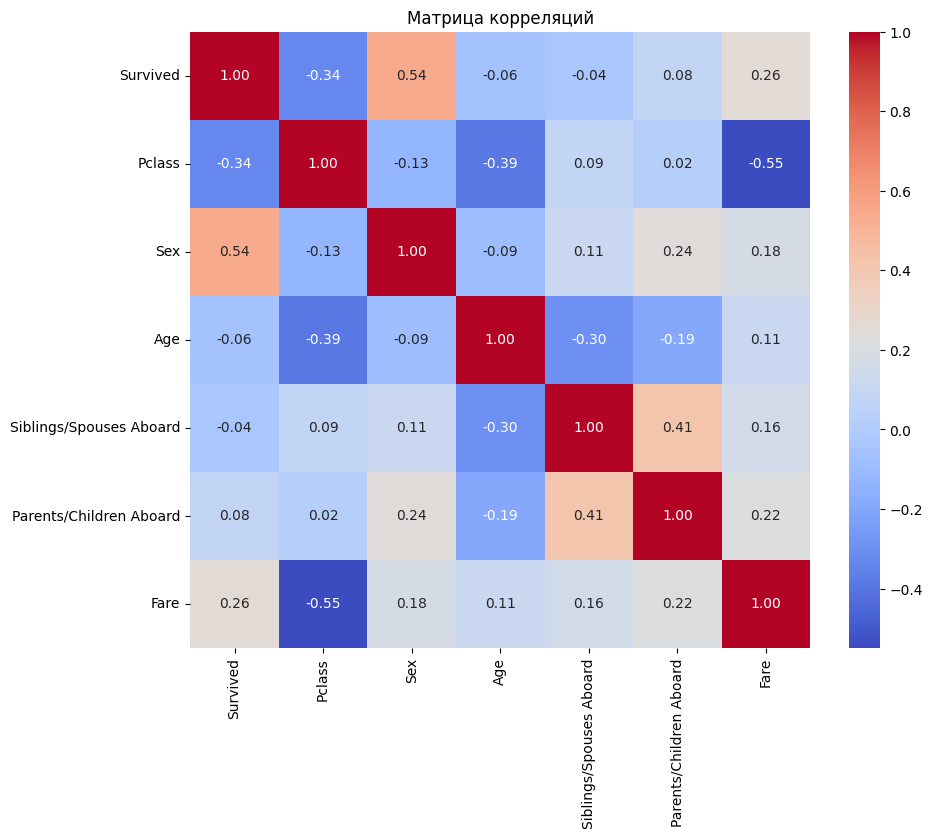

In [3]:
data['Sex'] = data['Sex'].map({'male' : 0, 'female' : 1})# используем функцию map и словарь для перевода в числовой тип
data = data.drop(columns = ['Name']) # используем drop для удаления
correlation_matrix = data.corr()# Рассчитываем корреляционную матрицу
plt.figure(figsize=(10, 8)) # задаем размеры фигуры для графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')# Визуализируем корреляционную матрицу
plt.title("Матрица корреляций")
plt.show()

Исходя из матрицы корреляций можно сделать вывод о том, что сильную положительную связь имеют признаки пола и факта выживания. Исходя из отрицательной корреляции признаков класса пассажира и выживаемости можно сделать вывод о том, что шанс выжить у пассажиров 1 класса был выше, чем у пассажиров 3 класса. Низкие значения связи признаков наличие количество братьев/сестер или супругов на борту и факта выживаемости, количество родителей или детей на борту и факта выживаемости говорит о том, что количество родственников на борту никак не влияло на выживаемость. Связь класса пассажира и цены билета итак очевидна.

Теперь с помощью диаграммы изобразим соотношение выживших и погибших. Но в начале для наглядности графиками переведем числовые значения в качественные.

In [4]:
data['Sex'] = data['Sex'].map({0 : 'male', 1 : 'female'}) # меняем для наглядности
data['Survived'] = data['Survived'].map({0 : 'Not survive', 1 : 'survive'})

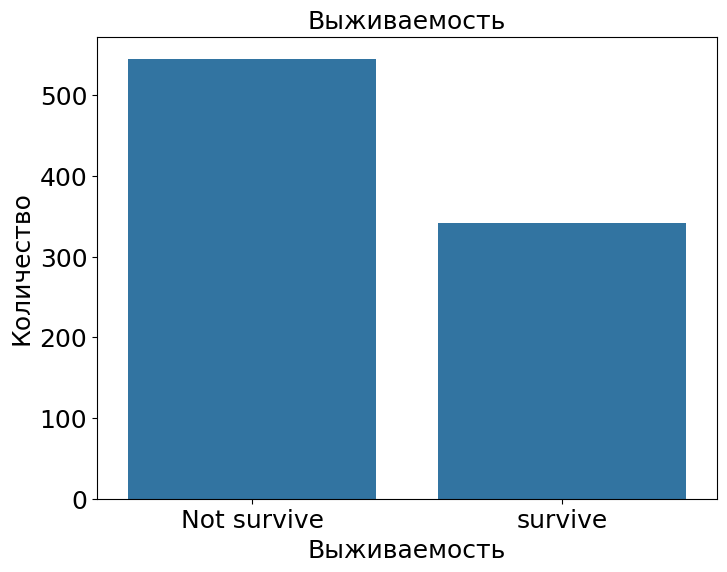

In [5]:
plt.figure(figsize=(8, 6))# задаем размеры фигуры для графика
sns.countplot(x='Survived', data=data) # строим диаграмму по столбцу Survived
plt.title('Выживаемость', fontsize=18) # задаем размер названия графика
plt.xlabel('Выживаемость', fontsize=18) # задаем размер оси Ox
plt.ylabel('Количество', fontsize=18) # задаем размер оси Oy
plt.gca().tick_params(labelsize=18)
plt.show()


Как мы видим из графика, большинство людей, к сожалению, не выжило. Давайте найдем процентное соотношениею

In [6]:
count_live = data[data['Survived'] == 'survive'] # количество выживших
count_dead = data[data['Survived'] == 'Not survive'] # количество невыживших
percent_survived = len(count_live) * 100 / (len(count_live) + len(count_dead)) # делим количество выживших на общее количество пассажиров
print(f'Процент выживших равен {round(percent_survived, 2)} %')

Процент выживших равен 38.56 %


Теперь давайте рассмотрим подробнее зависимость выживаемости от класса пассажира(уровня билета). Для этого изобразим столбчатую диаграмму.

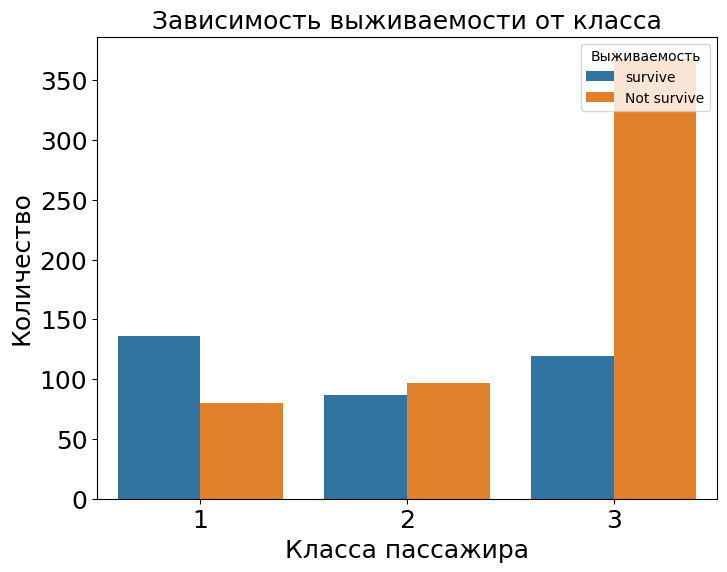

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data) # строим столбчатую диаграмму
plt.title('Зависимость выживаемости от класса', fontsize=18)
plt.xlabel('Класса пассажира', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.legend(title='Выживаемость', loc='upper right') # задаем легенду и ее местоположение
plt.gca().tick_params(labelsize=18) # задаем размер значений на лосях
plt.show()

Исходя из этой диаграммы можно понять, насколько сильно выживаемость пассажира зависела от его класса. Анализирую график можно сказать, что в первом классе выжило практически в 2 раза больше пассажиров, чем не выжили. Для 2(среднего) класса соотношение примерно одинаковое, с небольи преимуществом в пользу не выживших, а вот в 3 классе большая часть пассажиров не выжила.

Теперь давайте посмотрим на зависимость класса билета от возраста пассажира. Для этого используем boxplot(ящик с усами).

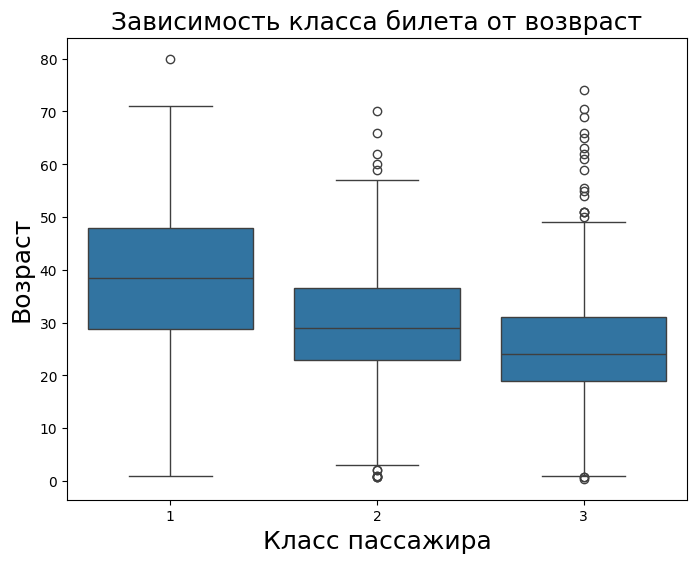

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=data) # строим ящик с усами
plt.title('Зависимость класса билета от возвраст', fontsize=18)
plt.xlabel('Класс пассажира', fontsize=18)
plt.ylabel('Возраст', fontsize=18)
plt.show()

Исходя из этих графиков видно, что в среднем чем старше пассажир, тем более билет класса выше он брал.

Теперь давайте посмотрим на зависимость выживаемости от пола.

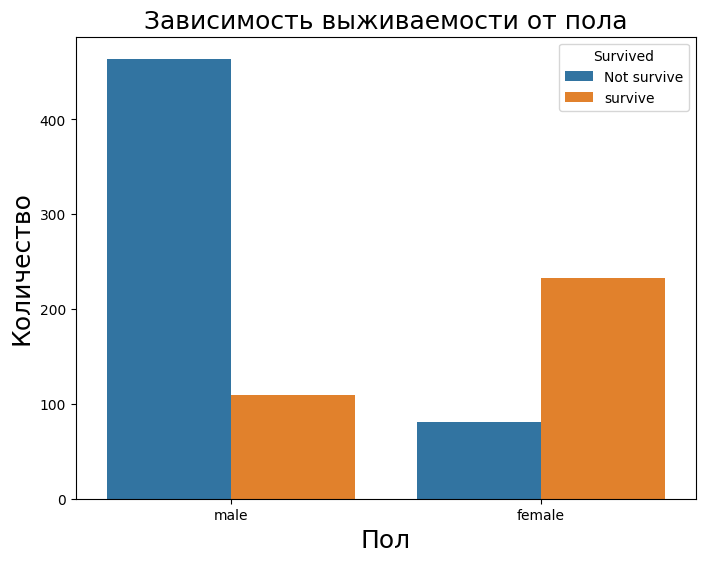

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Зависимость выживаемости от пола', fontsize=18)
plt.xlabel('Пол', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.legend(title='Survived', loc='upper right')
plt.show()


Исходя из этого графика можно сделать вывод о том, что выживаемость с полом действительно очень сильно коррелируют. Большая часть женщин выжила, а вот с мужчинами наоборот.

Теперь давайте посмотрим, сколько стоили билеты каждого класса. Для это будем использовать ящик с усами.

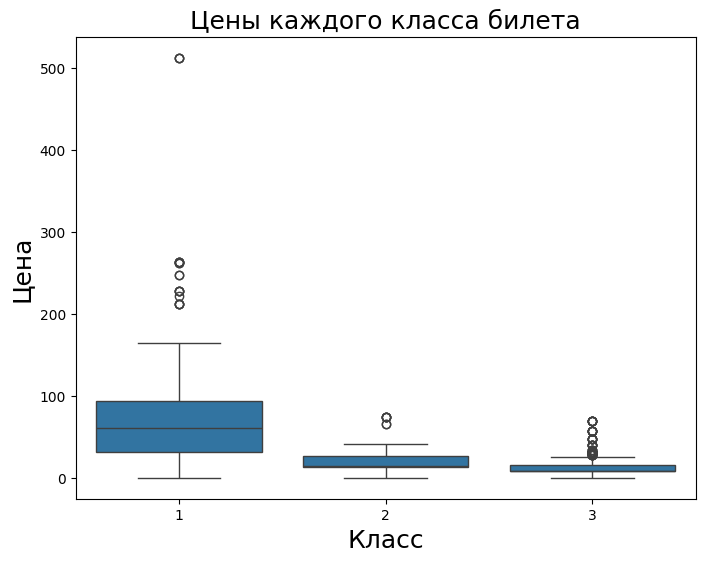

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Цены каждого класса билета', fontsize=18)
plt.xlabel('Класс', fontsize=18)
plt.ylabel('Цена', fontsize=18)
plt.show()

Исходя из этого графика видно, что цены на билеты 1 класса в среднем стоят намного больше, чем второго и третьего. А вот разница между 2 и 3 классом не велика.

Теперь давайте посчитаем средние цены для каждого класса:

In [11]:
price_1_class = data['Fare'][data['Pclass'] == 1].mean()
price_2_class = data['Fare'][data['Pclass'] == 2].mean()
price_3_class = data['Fare'][data['Pclass'] == 3].mean()
print(f'Средняя цена билетов 1 класса составляет {round(price_1_class, 2)}')
print(f'Средняя цена билетов 2 класса составляет {round(price_2_class, 2)}')
print(f'Средняя цена билетов 3 класса составляет {round(price_3_class, 2)}')

Средняя цена билетов 1 класса составляет 84.15
Средняя цена билетов 2 класса составляет 20.66
Средняя цена билетов 3 класса составляет 13.71
